In [3]:
import sys
sys.path.insert(1, '/global/u1/j/joeschm/jojo_github/ARCHIVE/ST_research/coding_tools')
from make_profiles_iterdb import create_profiles, auto_create_profiles
from plot_profiles_iterdb import plot_profiles, multi_plot_profiles

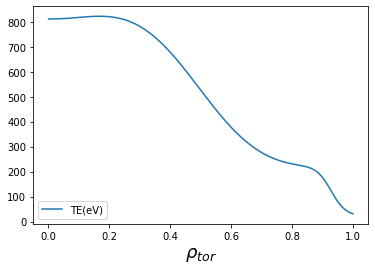

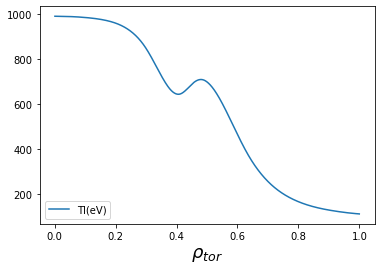

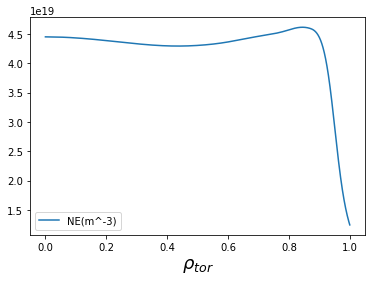

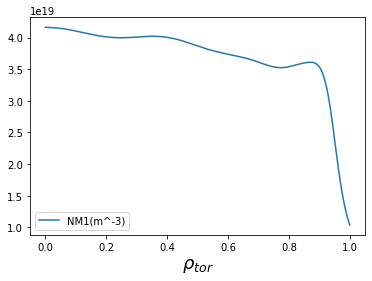

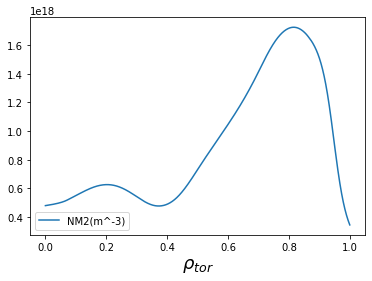

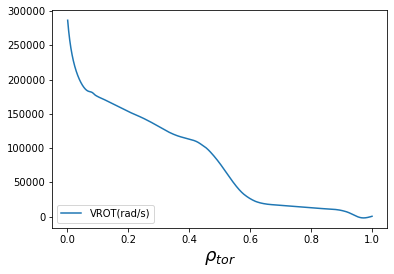

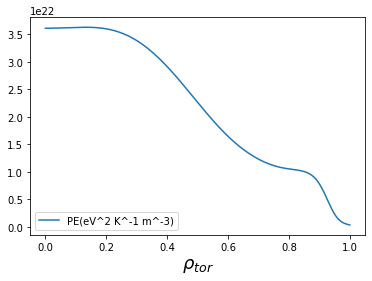

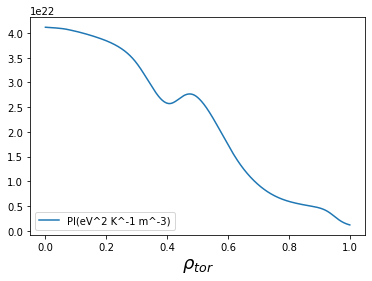

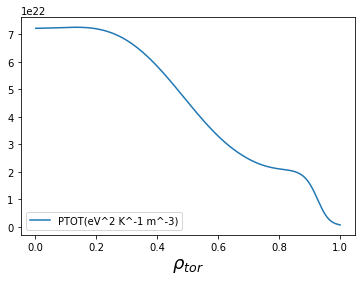

In [8]:
#Filepath for 129015
path_discharge = '/global/homes/j/joeschm/st_research/NSTXU_discharges/129015/'
profile_dict, g_plot_dict = auto_create_profiles(path_discharge)

x_start = 0
x_end = 1

plot_profiles(profile_dict, g_plot_dict, x_start, x_end)

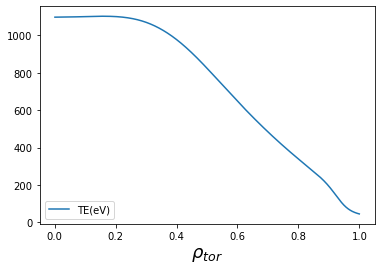

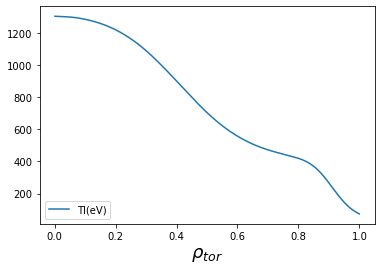

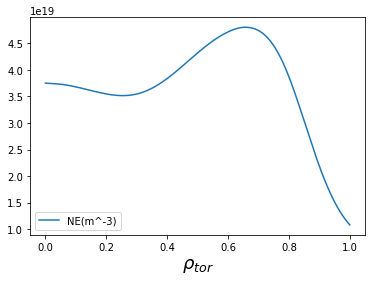

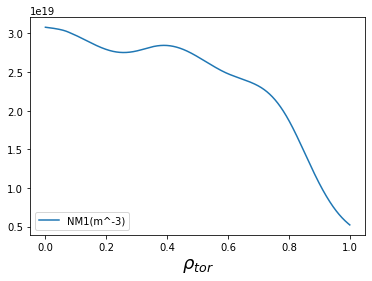

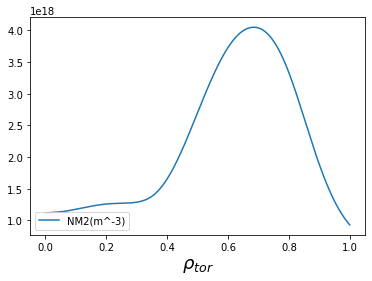

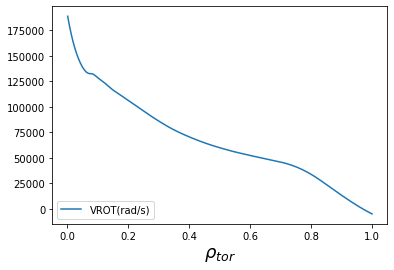

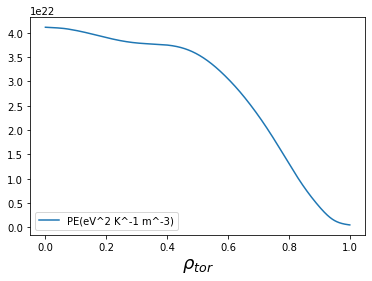

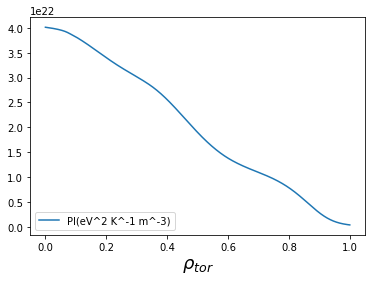

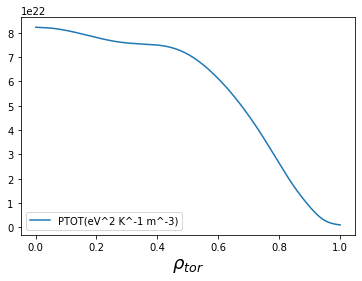

In [7]:
#Filepath for 129038
path_discharge = '/global/homes/j/joeschm/st_research/NSTXU_discharges/129038/'
profile_dict, g_plot_dict = auto_create_profiles(path_discharge)

# x_start = 0.499
# x_end = 0.50001

x_start = 0
x_end = 1

plot_profiles(profile_dict, g_plot_dict, x_start, x_end)

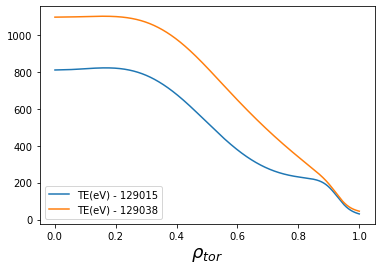

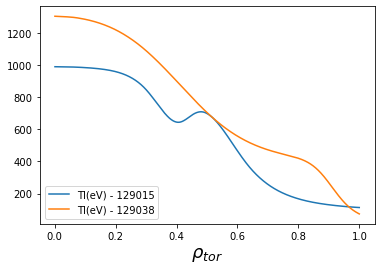

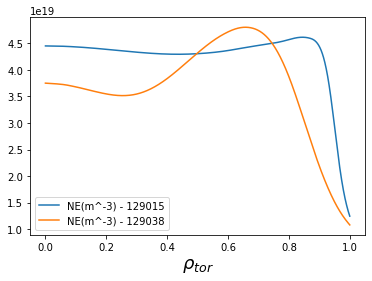

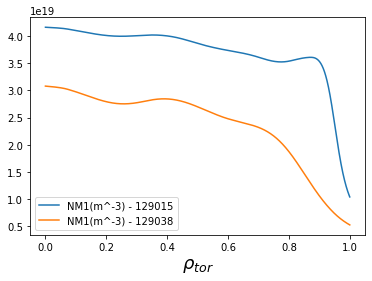

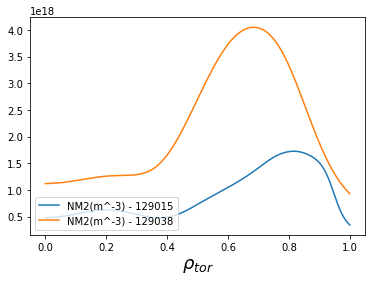

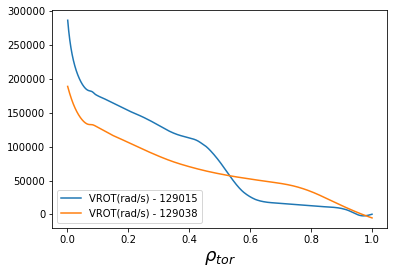

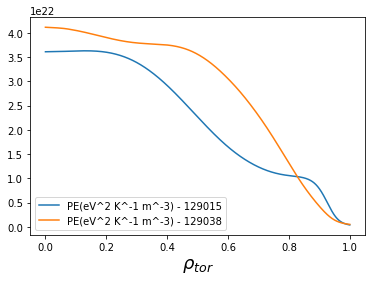

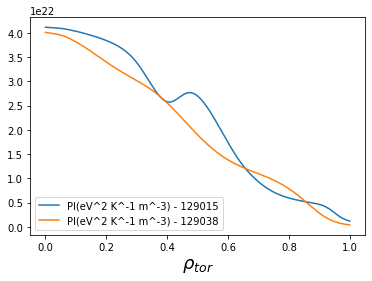

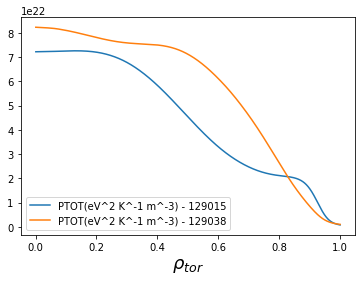

In [10]:

discharge_path_dict = {}
path = '/global/homes/j/joeschm/st_research/NSTXU_discharges/'

#Filepath for 129015
discharge = '129015'
path_discharge = path + discharge + '/'
discharge_path_dict[discharge] = {'filepath': path_discharge}


#Filepath for 129038
discharge = '129038'
path_discharge = path + discharge + '/'
discharge_path_dict[discharge] = {'filepath': path_discharge}

x_lim = 0.0
multi_plot_profiles(discharge_path_dict, x_lim)

In [5]:
def charge_at_x(dictionary, quantity, x_point):
    rhot = dictionary[0][quantity]['rhot']
    NX = dictionary[0][quantity]['arr']
    
    x_point = rhot[abs(x_point - rhot).argmin(axis=0)]
    rhot_ind = np.where(rhot == x_point)[0][0]
    
    NX_x = NX[rhot_ind]
    
    if quantity == 'NE':
        charge = -1
    elif quantity == 'NM1':
        charge = 1
    elif quantity == 'NM2':
        charge = 6
    
    CX_x = charge*NX_x
    
    return CX_x, NX_x

In [6]:
def slope_at_x(dictionary, quantity, x_point):
    rhot = dictionary[0][quantity]['rhot']
    NX = dictionary[0][quantity]['arr']
    
    x_point = rhot[abs(x_point - rhot).argmin(axis=0)]
    rhot_ind = np.where(rhot == x_point)[0][0]
    
    NX_x1 = NX[rhot_ind - 1]
    NX_x2 = NX[rhot_ind + 1]
    
    rhot_1 = rhot[rhot_ind - 1]
    rhot_2 = rhot[rhot_ind + 1]
    
    delta_x = rhot_2 - rhot_1
    delta_y = NX_x2 - NX_x1
    
    slope = delta_y/delta_x
    
    if quantity == 'NE':
        charge = -1
    elif quantity == 'NM1':
        charge = 1
    elif quantity == 'NM2':
        charge = 6
    
    print('x_location:', x_point, 'for quantity:', quantity)
    print('slope:', slope)
    print('')
    
    SX_x = slope*charge*NX_x1
    
    return slope

In [7]:
import numpy as np

path_129038 = '/global/homes/j/joeschm/st_research/NSTXU_discharges/129038'
prof_129038 = auto_create_profiles(path_129038)

x_point = 0.5

CE_x_PE, NE_x = charge_at_x(prof_129038, 'NE', x_point)
CI_x_PE, NI_x = charge_at_x(prof_129038, 'NM1', x_point)
CC_x_PE, NC_x = charge_at_x(prof_129038, 'NM2', x_point)

SE_x_PE = slope_at_x(prof_129038, 'NE', x_point)
SI_x_PE = slope_at_x(prof_129038, 'NM1', x_point)
SC_x_PE = slope_at_x(prof_129038, 'NM2', x_point)

print('total charge at PE:', "{:e}".format(CE_x_PE + CI_x_PE + CC_x_PE))
print('slope charge gradient at PE:', SE_x_PE + SI_x_PE + SC_x_PE)
print('')
print('')

x_point = 0.655

CE_x_NE, NE_x = charge_at_x(prof_129038, 'NE', x_point)
CI_x_NE, NI_x = charge_at_x(prof_129038, 'NM1', x_point)
CC_x_NE, NC_x = charge_at_x(prof_129038, 'NM2', x_point)

SE_x_NE = slope_at_x(prof_129038, 'NE', x_point)
SI_x_NE = slope_at_x(prof_129038, 'NM1', x_point)
SC_x_NE = slope_at_x(prof_129038, 'NM2', x_point)

print('total charge at NE:', "{:e}".format(CE_x_NE + CI_x_NE + CC_x_NE))
print('slope charge gradient at NE:', SE_x_NE + SI_x_NE + SC_x_NE)
print('')
print('')

x_point = 0.91

CE_x_OM, NE_x = charge_at_x(prof_129038, 'NE', x_point)
CI_x_OM, NI_x = charge_at_x(prof_129038, 'NM1', x_point)
CC_x_OM, NC_x = charge_at_x(prof_129038, 'NM2', x_point)

SE_x_OM = slope_at_x(prof_129038, 'NE', x_point)
SI_x_OM = slope_at_x(prof_129038, 'NM1', x_point)
SC_x_OM = slope_at_x(prof_129038, 'NM2', x_point)


print(CE_x_OM, CI_x_OM, CC_x_OM)
print('total charge at OM:', "{:e}".format(CE_x_OM + CI_x_OM + CC_x_OM))
print('slope charge gradient at OM:', SE_x_OM + SI_x_OM + SC_x_OM)
print('')
print('')


x_location: 0.4999246 for quantity: NE
slope: 4.876876876876471e+19

x_location: 0.4999246 for quantity: NM1
slope: -2.3023023023021105e+19

x_location: 0.4999246 for quantity: NM2
slope: 1.1963963963962968e+19

total charge at PE: 0.000000e+00
slope charge gradient at PE: 3.770970970970657e+19


x_location: 0.6550121 for quantity: NE
slope: 1.4016820184219978e+18

x_location: 0.6550121 for quantity: NM1
slope: -1.4657589106927178e+19

x_location: 0.6550121 for quantity: NM2
slope: 2.675210252302556e+18

total charge at NE: -2.000000e+12
slope charge gradient at NE: -1.0580696836202623e+19


x_location: 0.9099948 for quantity: NE
slope: -1.4852852852853267e+20

x_location: 0.9099948 for quantity: NM1
slope: -7.181581581581782e+19

x_location: 0.9099948 for quantity: NM2
slope: -1.2786786786787144e+19

-2.030413e+19 9.818809e+18 1.0485324e+19
total charge at OM: 3.000000e+12
slope charge gradient at OM: -2.3313113113113762e+20




In [8]:
# discharge_path_dict = {}
# path = '/global/homes/j/joeschm/st_research/NSTXU_discharges/'

# #Filepath for 132543
# discharge = '132543'
# path_discharge = path + discharge + '/'
# discharge_path_dict[discharge] = {'filepath': path_discharge}


# #Filepath for 132588
# discharge = '132588'
# path_discharge = path + discharge + '/'
# discharge_path_dict[discharge] = {'filepath': path_discharge}

# x_lim = 0
# multi_plot_profiles(discharge_path_dict, x_lim)

In [9]:
# discharge_path_dict = {}
# path = '/global/homes/j/joeschm/st_research/NSTXU_discharges/'

# #Filepath for 129015
# discharge = '129015'
# path_discharge = path + discharge + '/'
# discharge_path_dict[discharge] = {'filepath': path_discharge}

# #Filepath for 129038
# discharge = '129038'
# path_discharge = path + discharge + '/'
# discharge_path_dict[discharge] = {'filepath': path_discharge}

# #Filepath for 132543
# discharge = '132543'
# path_discharge = path + discharge + '/'
# discharge_path_dict[discharge] = {'filepath': path_discharge}

# #Filepath for 132588
# discharge = '132588'
# path_discharge = path + discharge + '/'
# discharge_path_dict[discharge] = {'filepath': path_discharge}

# x_lim = 0
# multi_plot_profiles(discharge_path_dict, x_lim)
